#### Miguel Parra BME 504 - Neuromuscular Systems
Assignment 1

-----------------

In [297]:
import numpy as np
import scipy.integrate as spInt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal
%matplotlib inline


# Model definition
kbRatio = 100
y0 = [0] # Initial amount of force
timeStart = 0 # second
timeEnd = 1 # second
steps = 10000 # Sampling Frequency
timeToSolve = (timeStart, timeEnd)



In [298]:
# Contraction Element (actuator) parameters
maxForce = 1 #N?
totalWaveTime = 25 # milliseconds
activationTime = 16 # In milliseconds
squareWaveFrequency = (1/(totalWaveTime/1000)) # Hz
dutyCycle = (activationTime / totalWaveTime) # Out of 1.0

### 1. Plot two, three, and several pulses in a row. Use one subplot for each train of pulses.

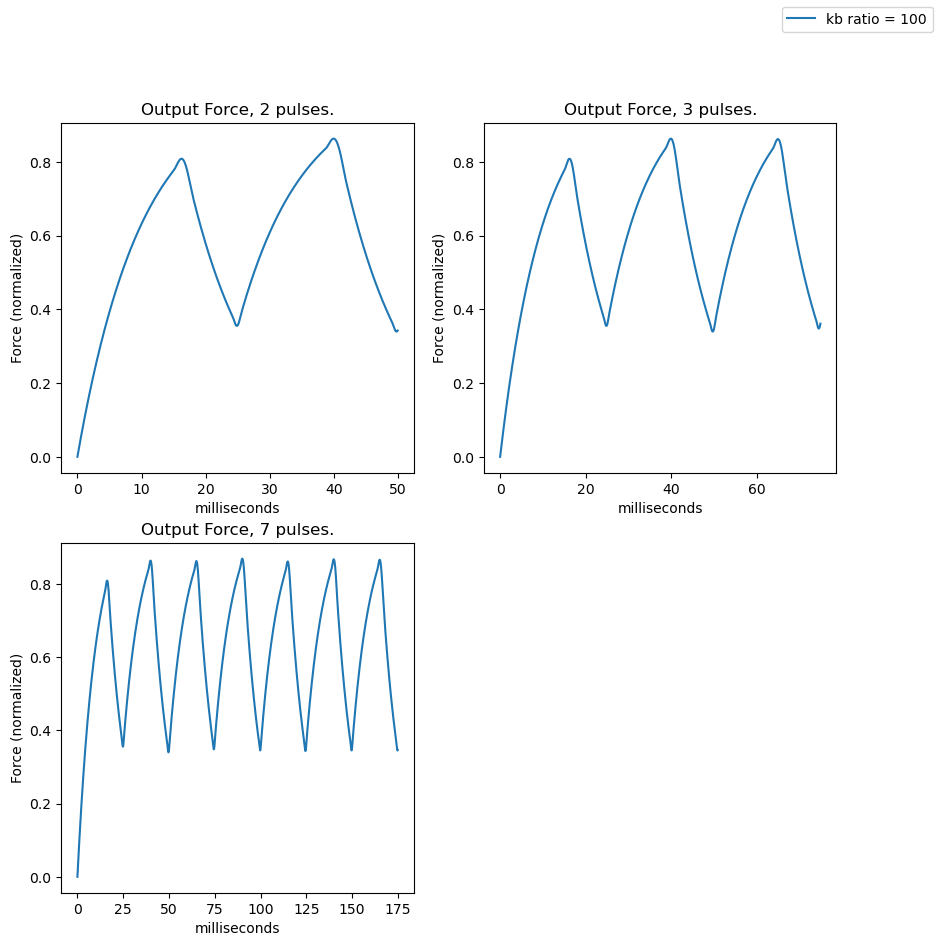

In [299]:
timeArray = np.linspace(timeToSolve[0],timeToSolve[1],steps, dtype=np.float64)
timeArrayPlot = np.linspace(timeToSolve[0], timeToSolve[1] * 1000, steps, dtype=np.float64)
stimForce = signal.square(2*np.pi*(squareWaveFrequency)*timeArray,dutyCycle)

stimForce[stimForce==-1] = 0
stimForce = stimForce*maxForce
odeArgs = (kbRatio, stimForce,timeArray)
y = spInt.solve_ivp(muscleModelODE, t_span=timeToSolve, t_eval=timeArray, y0=y0, args=odeArgs)
f, ax = plt.subplots(nrows=2, ncols=2)
# Plot the first 2 pulses
ax[0,0].plot(timeArrayPlot[0:totalWaveTime*20], y.y[0][0:totalWaveTime*20])
# Plot 3 pulses
ax[0,1].plot(timeArrayPlot[0:totalWaveTime*30], y.y[0][0:totalWaveTime*30])
# Plot 7 pulses
ax[1,0].plot(timeArrayPlot[0:totalWaveTime*70], y.y[0][0:totalWaveTime*70])
f.set_size_inches(10,10)
ax[0,0].set_title("Output Force, 2 pulses.")
ax[0,0].set_xlabel("milliseconds")
ax[0,0].set_ylabel("Force (normalized)")
ax[0,1].set_title("Output Force, 3 pulses.")
ax[0,1].set_ylabel("Force (normalized)")
ax[0,1].set_xlabel("milliseconds")
ax[1,0].set_title("Output Force, 7 pulses.")
ax[1,0].set_ylabel("Force (normalized)")
ax[1,0].set_xlabel("milliseconds")
ax[1,1].axis('off')
f.legend(["kb ratio = " + str(kbRatio)])

---------------

### 2. Explore what happens when the inter-pulse interval is reduced and increased. 

Here, we will reduce the interpulse interval to 4 milliseconds, by lengthening the overal period of the square wave disproportionately. 

Recall that \#1's interpulse interval was 9 milliseconds.

In [300]:
# Contraction Element (actuator) parameters
maxForce = 1 #N?
totalWaveTime = 20 # milliseconds
activationTime = 16 # In milliseconds - Activation time does not change

In [301]:
squareWaveFrequency = (1/(totalWaveTime/1000)) # Hz
dutyCycle = (activationTime / totalWaveTime) # Out of 1.0

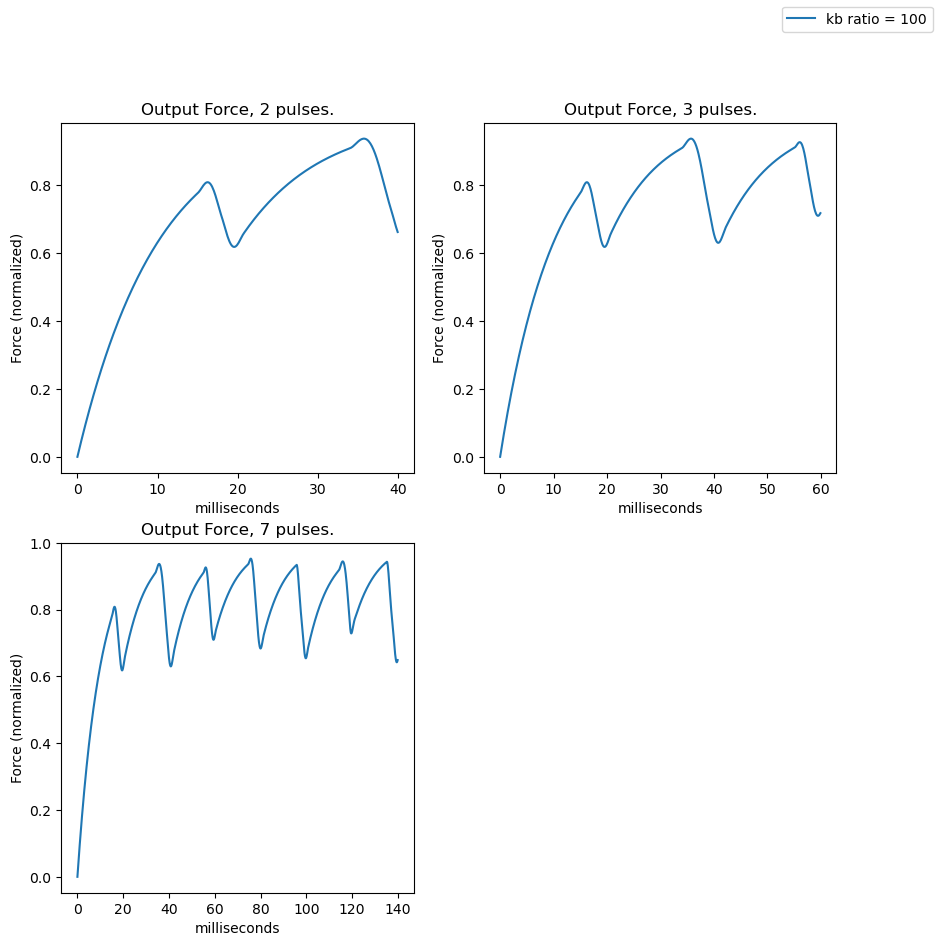

In [302]:
timeArray = np.linspace(timeToSolve[0],timeToSolve[1],steps, dtype=np.float64)
timeArrayPlot = np.linspace(timeToSolve[0], timeToSolve[1] * 1000, steps, dtype=np.float64)
stimForce = signal.square(2*np.pi*(squareWaveFrequency)*timeArray,dutyCycle)

stimForce[stimForce==-1] = 0
stimForce = stimForce*maxForce
odeArgs = (kbRatio, stimForce,timeArray)
y = spInt.solve_ivp(muscleModelODE, t_span=timeToSolve, t_eval=timeArray, y0=y0, args=odeArgs)
f, ax = plt.subplots(nrows=2, ncols=2)
# Plot the first 2 pulses
ax[0,0].plot(timeArrayPlot[0:totalWaveTime*20], y.y[0][0:totalWaveTime*20])
# Plot 3 pulses
ax[0,1].plot(timeArrayPlot[0:totalWaveTime*30], y.y[0][0:totalWaveTime*30])
# Plot 7 pulses
ax[1,0].plot(timeArrayPlot[0:totalWaveTime*70], y.y[0][0:totalWaveTime*70])
f.set_size_inches(10,10)
ax[0,0].set_title("Output Force, 2 pulses.")
ax[0,0].set_xlabel("milliseconds")
ax[0,0].set_ylabel("Force (normalized)")
ax[0,1].set_title("Output Force, 3 pulses.")
ax[0,1].set_ylabel("Force (normalized)")
ax[0,1].set_xlabel("milliseconds")
ax[1,0].set_title("Output Force, 7 pulses.")
ax[1,0].set_ylabel("Force (normalized)")
ax[1,0].set_xlabel("milliseconds")
ax[1,1].axis('off')
f.legend(["kb ratio = " + str(kbRatio)])

Discussion: It appears that the peak force at the end of each contraction is not consistent - it fluctuates between cycles. The peak force is higher, as expected; but the waveforms are not as consistent as what was shown previously.

--------

Now we will explore what happens when we increase the interpulse interval.

In [303]:
# Contraction Element (actuator) parameters
maxForce = 1 #N?
totalWaveTime = 50 # milliseconds - Overall duty cycle ratio decreases.
activationTime = 16 # In milliseconds - Activation time does not change.

In [304]:
squareWaveFrequency = (1/(totalWaveTime/1000)) # Hz
dutyCycle = (activationTime / totalWaveTime) # Out of 1.0

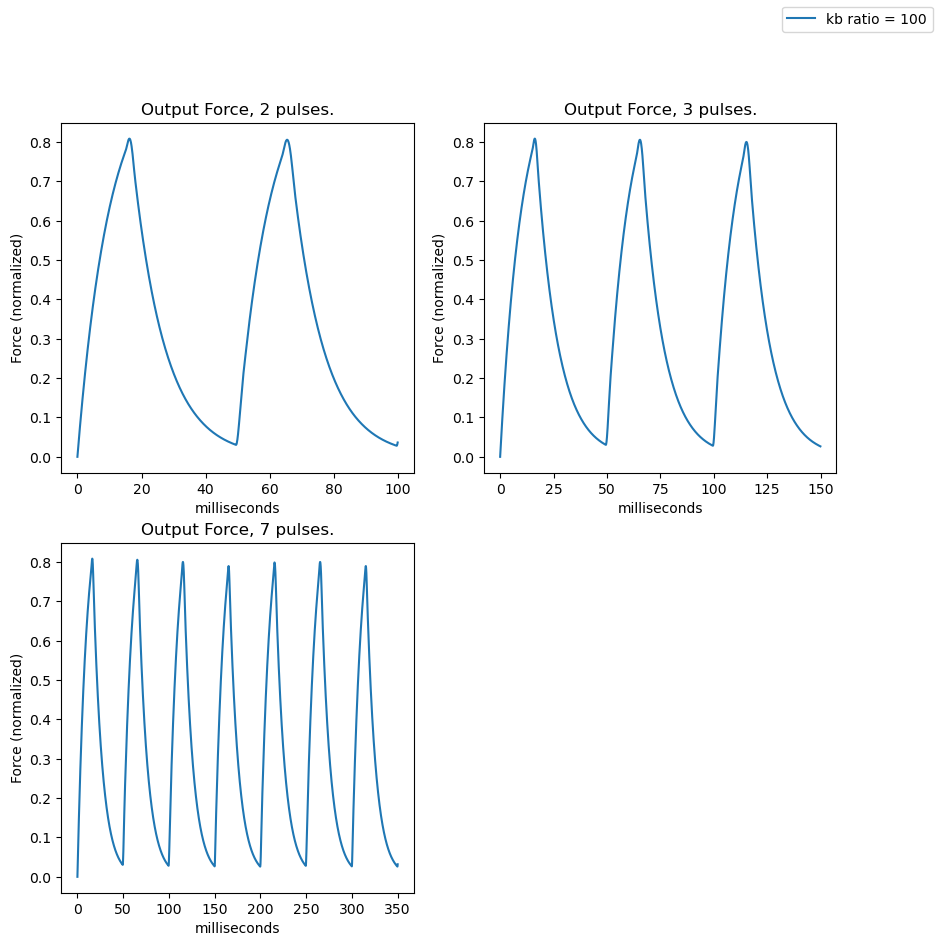

In [305]:
timeArray = np.linspace(timeToSolve[0],timeToSolve[1],steps, dtype=np.float64)
timeArrayPlot = np.linspace(timeToSolve[0], timeToSolve[1] * 1000, steps, dtype=np.float64)
stimForce = signal.square(2*np.pi*(squareWaveFrequency)*timeArray,dutyCycle)

stimForce[stimForce==-1] = 0
stimForce = stimForce*maxForce
odeArgs = (kbRatio, stimForce,timeArray)
y = spInt.solve_ivp(muscleModelODE, t_span=timeToSolve, t_eval=timeArray, y0=y0, args=odeArgs)
f, ax = plt.subplots(nrows=2, ncols=2)
# Plot the first 2 pulses
ax[0,0].plot(timeArrayPlot[0:totalWaveTime*20], y.y[0][0:totalWaveTime*20])
# Plot 3 pulses
ax[0,1].plot(timeArrayPlot[0:totalWaveTime*30], y.y[0][0:totalWaveTime*30])
# Plot 7 pulses
ax[1,0].plot(timeArrayPlot[0:totalWaveTime*70], y.y[0][0:totalWaveTime*70])
f.set_size_inches(10,10)
ax[0,0].set_title("Output Force, 2 pulses.")
ax[0,0].set_xlabel("milliseconds")
ax[0,0].set_ylabel("Force (normalized)")
ax[0,1].set_title("Output Force, 3 pulses.")
ax[0,1].set_ylabel("Force (normalized)")
ax[0,1].set_xlabel("milliseconds")
ax[1,0].set_title("Output Force, 7 pulses.")
ax[1,0].set_ylabel("Force (normalized)")
ax[1,0].set_xlabel("milliseconds")
ax[1,1].axis('off')
f.legend(["kb ratio = " + str(kbRatio)])

Discussion: The minimum force that the model generates after the first pulse is substantially lower than that of previous models - this is because the longer delay in activation is allowing us to get closer to zero. The wave is more consistent than the short pulse model, meaning the peak force is more level than what was observed previously. Also, extending the overall wave period has increased our simulation our to nearly 350 ms to generate 7 pulses - whereas in previous models we always came in under 200 ms.

----------------------------

Hill Type Muscle Model Defintion:
$$ \dfrac{dF(t)}{dt} = \dfrac{k}{B} (f(t)_0 - F(t))$$
$$where \  \dfrac{k}{B} = 100$$

In [306]:
#solve_ivp functions must be in the form func(t, y)
def muscleModelODE(t, y, kbRatio, drivingForce, timeArray):
    # fill in the gap
    diffArray = np.absolute(timeArray-t)
    idx = diffArray.argmin()
    dydt = [((kbRatio)*(drivingForce[idx] - y))]
    return dydt